([<matplotlib.patches.Wedge at 0x7f3de49b5a90>,
 [Text(1.0029451487791243, 0.45177541825604034, 'vw'),
  Text(0.4915952954602606, 0.9840396666198672, 'ford'),
  Text(-0.06392734957794274, 1.098140835219208, 'mercedes'),
  Text(-0.58938029929197, 0.9287792325448002, 'audi'),
  Text(-0.9280375179695062, 0.5905475131105022, 'peugeot'),
  Text(-1.0799088491589592, 0.20927703531007047, 'bmw'),
  Text(-1.0859247206969243, -0.17540667313220218, 'renault'),
  Text(-0.9807733928794458, -0.49807986490094186, 'citroën'),
  Text(-0.8073585825937295, -0.7471091748280464, 'skoda'),
  Text(-0.5819171838304618, -0.9334732942954633, 'opel'),
  Text(-0.334159107370012, -1.0480160738088309, 'toyota'),
  Text(-0.09737331270054027, -1.0956817229349602, 'kia'),
  Text(0.12334500207120871, -1.0930626745361192, 'hyundai'),
  Text(0.333170774952274, -1.0483306895811557, 'volvo'),
  Text(0.5045426935869374, -0.9774644087372379, 'nissan'),
  Text(0.6381436915054219, -0.895975797101592, 'seat'),
  Text(0.75807781

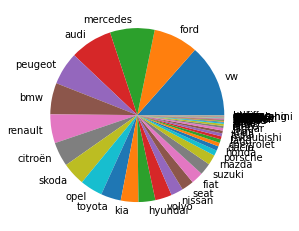

In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt

re = requests.get('http://notebookserver:5000/api/manufactorcount')

json_dump = json.dumps(re.text)

df = pd.read_json(re.text)

pd.set_option("display.max.columns", None)
df.head()
df1 = df.iloc[0]
make = list(df.iloc[0])
count = list(df.iloc[1])
width = 1
plt.pie(count,labels=make)








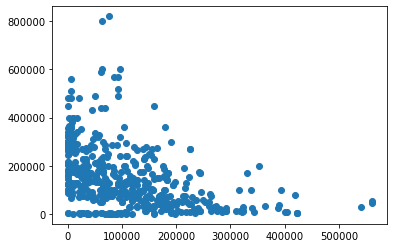

In [3]:
re = requests.get('http://notebookserver:5000/api/pricemiles')
df = pd.read_json(re.text)
#Make all non-numeric entries to NaN.
numbersOnlyPrice = pd.to_numeric(df.iloc[1], errors='coerce')
numbersOnlyMiles = pd.to_numeric(df.iloc[0], errors='coerce')

plt.scatter(numbersOnlyMiles, numbersOnlyPrice)
plt.show() 


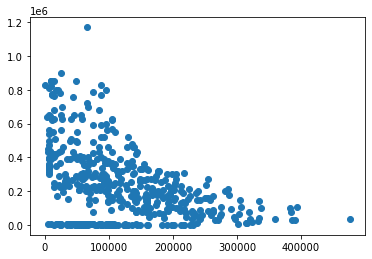

In [4]:
re = requests.get('http://notebookserver:5000/api/pricemiles/make?make=audi')
df = pd.read_json(re.text)
#df[df.id.apply(lambda x: x.isnumeric())]
#Make all non-numeric entries to NaN.
numbersOnlyPrice = pd.to_numeric(df.iloc[1], errors='coerce')
numbersOnlyMiles = pd.to_numeric(df.iloc[0], errors='coerce')

plt.scatter(numbersOnlyMiles, numbersOnlyPrice)
plt.show() 